In [4]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('diabetes_prediction_dataset.csv')

In [6]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [7]:
#limpiando datos 
#gender = {0: 'hombre', 1: 'mujer', 2: 'otro'}
have_diabetes = {0: 'No diabetes', 1: 'Diabetes'}
#smoking_history = {0: 'No info', 1:'never',2:'current',3:'former',4:'ever',5:'not current'}
#Convirtiendo 
df.gender = df.gender.map({'Male':0,'Female':1,'otro':2})
df.smoking_history = df.smoking_history.map({'No info':0,'never':1, 'current': 2,'former':3,'ever':4,'not current':5})

In [8]:
df.gender = df.gender.fillna(df['gender'].mean())

In [9]:
df.smoking_history = df.smoking_history.fillna(df['smoking_history'].mean())

In [10]:
df.describe()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.585625,41.885856,0.07485,0.039420,2.025022,27.320767,5.527507,138.058060,0.085000
std,0.492572,22.516840,0.26315,0.194593,1.088334,6.636783,1.070672,40.708136,0.278883
min,0.000000,0.080000,0.00000,0.000000,1.000000,10.010000,3.500000,80.000000,0.000000
25%,0.000000,24.000000,0.00000,0.000000,1.000000,23.630000,4.800000,100.000000,0.000000
50%,1.000000,43.000000,0.00000,0.000000,2.025022,27.320000,5.800000,140.000000,0.000000
75%,1.000000,60.000000,0.00000,0.000000,2.025022,29.580000,6.200000,159.000000,0.000000
max,1.000000,80.000000,1.00000,1.000000,5.000000,95.690000,9.000000,300.000000,1.000000


In [11]:
data_x = df.drop(['gender','smoking_history','diabetes'],axis='columns')
data_y = df.diabetes

In [12]:
decission_model = DecisionTreeClassifier()

In [13]:
train_x, test_x, train_y, test_y = train_test_split(data_x,data_y,train_size=0.9)

In [14]:
decission_model.fit(train_x,train_y)

DecisionTreeClassifier()

In [15]:
y_predicted = decission_model.predict(test_x)

In [16]:
print(f'Score del modelo: {round(decission_model.score(test_x,test_y),4)*100}%')

Score del modelo: 95.67%


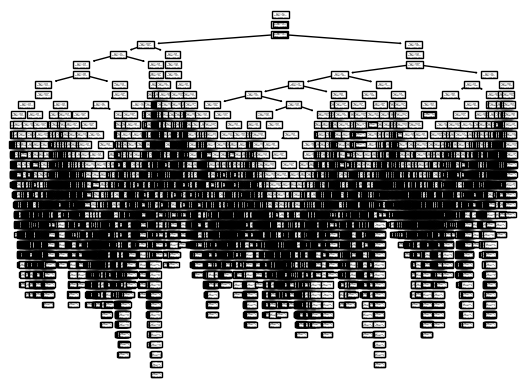

In [17]:
tree.plot_tree(decission_model)
plt.show()

In [18]:
result = ['no tiene diabetes','tiene diabetes']
hyper = ['no tiene hipertensión','tiene hipertensión']
heart = ['no tiene problemas cardiacos', 'tiene problema cardiacos']
age = 44
hypertension = 0
heart_disease = 0
bmi = 19.31
hba1c = 6.5
blood_glucose = 200

In [19]:
def classify_diabetes(model, age, hypertension, heart_disease, bmi, hba1c,blood_glucose):
    predicted = model.predict([[age,hypertension,heart_disease,bmi,hba1c,blood_glucose]])
    print(f'Una personas de {age} años, que {hyper[hypertension]}, {heart[heart_disease]} , un imc de {bmi} , emoglobina de {hba1c} y un nivel de glucosa de {blood_glucose}. se determina que {result[predicted[0]]}')

In [20]:
classify_diabetes(decission_model,age,hypertension,heart_disease,bmi,hba1c,blood_glucose)

Una personas de 44 años, que no tiene hipertensión, no tiene problemas cardiacos , un imc de 19.31 , emoglobina de 6.5 y un nivel de glucosa de 200. se determina que tiene diabetes


d:\algoritmica\algoritmica-2023-2\venv\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
